<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W8D2_ExercisesXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

In [3]:
!pip install spacy

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Exercise 1
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

def preprocess_text(data):
    lemmatizer = WordNetLemmatizer()
    preprocessed_data = []
    for text in data['Review']:
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [token for token in tokens if token not in string.punctuation]
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_text = ' '.join(tokens)
        preprocessed_data.append(preprocessed_text)
    return preprocessed_data

preprocessed_reviews = preprocess_text(data)

for review in preprocessed_reviews:
    print(review)


at mcdonald 's the food wa ok and the service wa bad
i would not recommend this japanese restaurant to anyone
i loved this restaurant when i traveled to thailand last summer
the menu of loving ha a wide variety of option
the staff wa friendly and helpful at google 's employee restaurant
the ambiance at bella italia is amazing and the pasta dish are delicious
i had a terrible experience at pizza hut the pizza wa burnt and the service wa slow
the sushi at sushi express is always fresh and flavorful
the steakhouse on main street ha a cozy atmosphere and excellent steak
the dessert selection at sweet treat is to die for


In [8]:
preprocessed_reviews = preprocess_text(data)
print(preprocessed_reviews)
preprocessed_data = {'Preprocessed_Review': preprocessed_reviews}
print(preprocessed_data)

["at mcdonald 's the food wa ok and the service wa bad", 'i would not recommend this japanese restaurant to anyone', 'i loved this restaurant when i traveled to thailand last summer', 'the menu of loving ha a wide variety of option', "the staff wa friendly and helpful at google 's employee restaurant", 'the ambiance at bella italia is amazing and the pasta dish are delicious', 'i had a terrible experience at pizza hut the pizza wa burnt and the service wa slow', 'the sushi at sushi express is always fresh and flavorful', 'the steakhouse on main street ha a cozy atmosphere and excellent steak', 'the dessert selection at sweet treat is to die for']
{'Preprocessed_Review': ["at mcdonald 's the food wa ok and the service wa bad", 'i would not recommend this japanese restaurant to anyone', 'i loved this restaurant when i traveled to thailand last summer', 'the menu of loving ha a wide variety of option', "the staff wa friendly and helpful at google 's employee restaurant", 'the ambiance at 

In [11]:
import spacy

def perform_ner(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

perform_data = [perform_ner(text) for text in data['Review']]
perform_preprocessed = [perform_ner(text) for text in preprocessed_data['Preprocessed_Review']]

print(f'\nNER tagging for row data: {perform_data}')
print(f'\nNER tagging for preprocessed data: {perform_preprocessed}')



NER tagging for row data: [[("McDonald's", 'ORG')], [('Japanese', 'NORP')], [('Thailand', 'GPE'), ('last summer', 'DATE')], [('Loving', 'GPE')], [('Google', 'ORG')], [('Bella Italia', 'ORG')], [('Pizza Hut', 'ORG')], [('Sushi Express', 'ORG')], [('Main Street', 'FAC')], [('Sweet Treats', 'FAC')]]

NER tagging for preprocessed data: [[("mcdonald 's", 'ORG')], [('japanese', 'NORP')], [('thailand', 'GPE'), ('last summer', 'DATE')], [], [('google', 'ORG')], [('bella italia', 'ORG')], [], [('sushi express', 'ORG')], [], []]


In [17]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def perform_pos_tagging(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    return tagged

pos_tagging_data = [perform_pos_tagging(text) for text in data['Review']]
pos_tagging_preprocessed = [perform_pos_tagging(text) for text in preprocessed_data['Preprocessed_Review']]

print(f'POS tagging for row data: {pos_tagging_data}')
print(f'POS tagging for preprocessed data: {pos_tagging_preprocessed}')

POS tagging for row data: [[('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')], [('I', 'PRP'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('Japanese', 'JJ'), ('restaurant', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('.', '.')], [('I', 'PRP'), ('loved', 'VBD'), ('this', 'DT'), ('restaurant', 'NN'), ('when', 'WRB'), ('I', 'PRP'), ('traveled', 'VBD'), ('to', 'TO'), ('Thailand', 'NNP'), ('last', 'JJ'), ('summer', 'NN'), ('.', '.')], [('The', 'DT'), ('menu', 'NN'), ('of', 'IN'), ('Loving', 'NNP'), ('has', 'VBZ'), ('a', 'DT'), ('wide', 'JJ'), ('variety', 'NN'), ('of', 'IN'), ('options', 'NNS'), ('.', '.')], [('The', 'DT'), ('staff', 'NN'), ('was', 'VBD'), ('friendly', 'JJ'), ('and', 'CC'), ('helpful', 'JJ'), ('at', 'IN'), ('Google', 'NNP'), ("'s", 'POS'), ('employees', 'NNS'), ('restaurant', 'VBP'), ('.', '.')], [('The'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
# Exercise 2
!pip install nltk gensim

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import gensim.downloader as api
nltk.download('punkt')


tokenized_data = [word_tokenize(data) for data in data['Review']]
tokenized_preprocessed_data = [word_tokenize(data) for data in preprocessed_data['Preprocessed_Review']]
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=2, min_count=1, workers=4)
example_result = model.wv.most_similar(positive=['restaurant', 'service'], negative=['slow'], topn=1)
print(f'Result for row data: {example_result}')

tokenized_preprocessed_data = [word_tokenize(data) for data in preprocessed_data['Preprocessed_Review']]
model_prepro = Word2Vec(sentences=tokenized_preprocessed_data, vector_size=100, window=2, min_count=1, workers=4)
example_result_prepro = model_prepro.wv.most_similar(positive=['restaurant', 'service'], negative=['slow'], topn=1)
print(f'Result for preprocessed data: {example_result_prepro}')

Result for row data: [('pasta', 0.29456743597984314)]
Result for preprocessed data: [('traveled', 0.23356853425502777)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
from gensim.models import Word2Vec

tokenized_reviews = [review.split() for review in preprocessed_reviews]

model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

print("Vocabulary size:", len(model.wv.key_to_index))
print("Vector dimensions:", model.wv.vector_size)

word_vector = model.wv['restaurant']
print("Vector for the word 'restaurant':", word_vector)

Vocabulary size: 73
Vector dimensions: 100
Vector for the word 'restaurant': [ 8.1674177e-03 -4.4434578e-03  8.9869155e-03  8.2659107e-03
 -4.4314973e-03  3.0580675e-04  4.2812899e-03 -3.9270637e-03
 -5.5642766e-03 -6.5106759e-03 -6.6542660e-04 -3.0941010e-04
  4.4759647e-03 -2.4658025e-03 -1.6343854e-04  2.4637687e-03
  4.8691458e-03 -3.6001391e-05 -6.3445172e-03 -9.2667444e-03
  3.1576095e-05  6.6730543e-03  1.4718148e-03 -8.9723989e-03
 -7.9311794e-03  6.5554688e-03 -3.7862777e-03  6.2541878e-03
 -6.6812830e-03  8.4828380e-03 -6.4987689e-03  3.2782282e-03
 -1.0456725e-03 -6.7944699e-03 -3.2924237e-03 -1.1560653e-03
 -5.4703732e-03 -1.2058570e-03 -7.5593642e-03  2.6319039e-03
  9.0603707e-03 -2.3757631e-03 -9.7424950e-04  3.5081226e-03
  8.6704660e-03 -5.9208577e-03 -6.8949098e-03 -2.9305748e-03
  9.1437157e-03  8.6592342e-04 -8.6779315e-03 -1.4455951e-03
  9.4750645e-03 -7.5597763e-03 -5.3546685e-03  9.3133366e-03
 -8.9685004e-03  3.8292229e-03  6.6575530e-04  6.6592554e-03
  8.3019

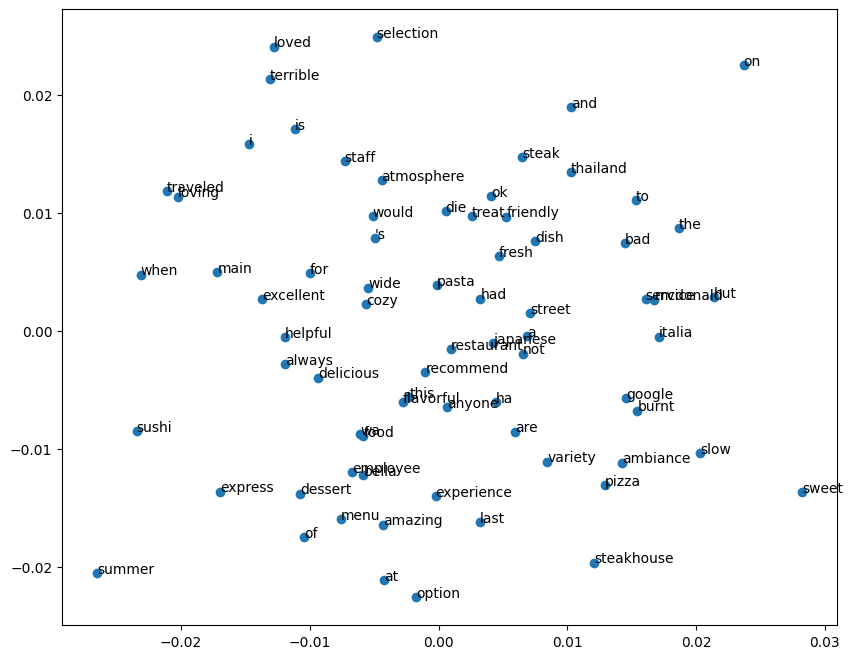

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(model):
    X = model.wv[model.wv.key_to_index.keys()]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)


    plt.figure(figsize=(10,8))
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.key_to_index.keys())
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()


plot_word_embeddings(model)